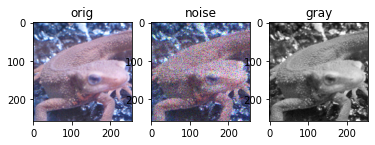

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 3, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

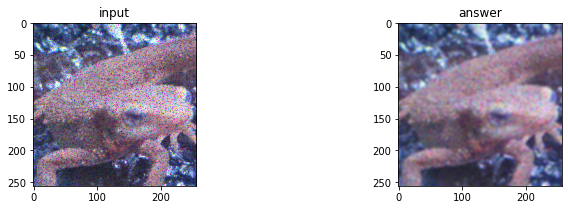

In [2]:
# Q11
img_smoth = cv2.blur(img_noise, (5,5))

plt.figure(figsize=(12,3))
plt.subplot(1,2,1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth)
plt.show()

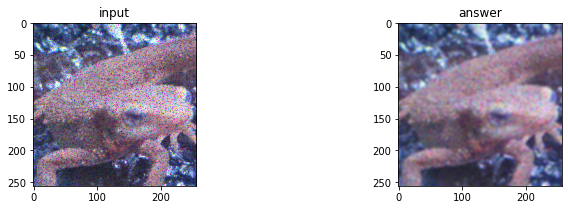

In [4]:
k = np.full((5,5),1/25)
img_smoth2 = cv2.filter2D(img_noise, -1, k)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth2)
plt.show()

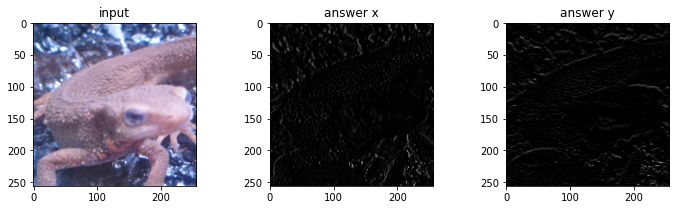

In [12]:
# Q14
kx = np.array([[0,0,0],[-1,1,0],[0,0,0]])
ky = np.array([[0,-1,0],[0,1,0],[0,0,0]])
ax = cv2.filter2D(img_gray, -1, kx)
ay = cv2.filter2D(img_gray, -1, ky)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.show()

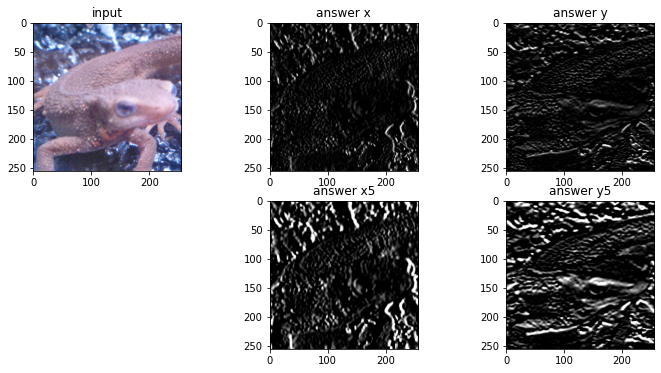

In [18]:
# Q15
def prewitt(size = (3,3), mode='x'):
    k = np.zeros(size)
    if mode=='x':
        k[:, 0] = 1
        k[:, -1] = -1
    else:
        k[0, :] = 1
        k[-1, :] = -1
    return k

ax = cv2.filter2D(img_gray, -1, prewitt(mode='x'))
ay = cv2.filter2D(img_gray, -1, prewitt(mode='y'))
ax5 = cv2.filter2D(img_gray, -1, prewitt(size=(5,5),mode='x'))
ay5 = cv2.filter2D(img_gray, -1, prewitt(size=(5,5),mode='y'))

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(2, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(2, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.subplot(2, 3, 5); plt.title('answer x5'); plt.imshow(ax5, cmap='gray')
plt.subplot(2, 3, 6); plt.title('answer y5'); plt.imshow(ay5, cmap='gray')
plt.show()



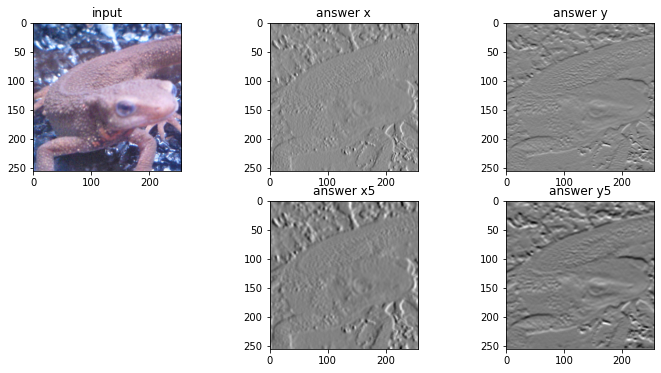

In [27]:
# Q16
def filter_sobel(size=(3,3), mode='x'):
    k = np.zeros(size)
    if mode=='x':
        k[:, 0] = 1
        k[:, -1] = -1
        k[(size[0]+1)//2, 0] = 2
        k[(size[0]+1)//2, -1] = -2
    else:
        k[0, :] = 1
        k[-1, :] = -1
        k[0, (size[1]+1)//2] = 2
        k[-1, (size[1]+1)//2] = -2
    return k

def norm(d):
    d -= ax.min()
    d /= ax.max()
    return d

ax = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(mode='x')))
ay = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(mode='y')))
ax5 = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(size=(5,5),mode='x')))
ay5 = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(size=(5,5),mode='y')))

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(2, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(2, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.subplot(2, 3, 5); plt.title('answer x5'); plt.imshow(ax5, cmap='gray')
plt.subplot(2, 3, 6); plt.title('answer y5'); plt.imshow(ay5, cmap='gray')
plt.show()

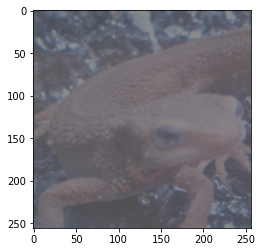

In [28]:
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_dark.png')
plt.imshow(img_dark); plt.show()

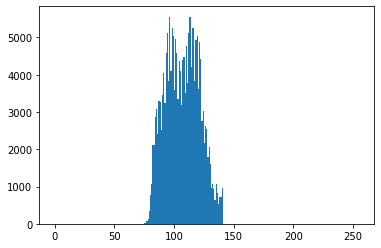

In [34]:
plt.hist(img_dark.ravel(), bins=255, range=(0,255))
plt.show()

Text(0.5, 1.0, 'light gray')

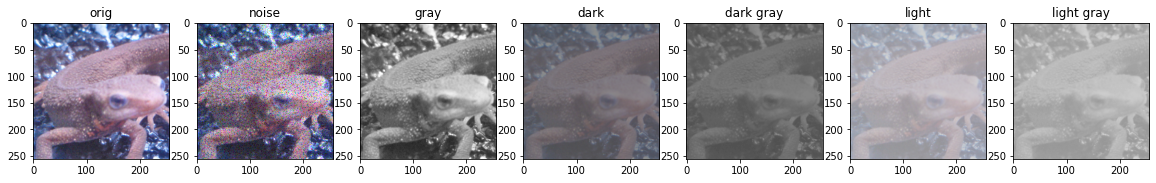

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_dark.png')
img_dark_gray = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_light = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_light.png')
img_light_gray = cv2.cvtColor(img_light, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 4))
plt.subplot(1, 7, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 7, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 7, 3); plt.imshow(img_gray, cmap='gray', norm=Normalize(vmin=0, vmax=255)); plt.title('gray')
plt.subplot(1, 7, 4); plt.imshow(img_dark);  plt.title('dark')
plt.subplot(1, 7, 5); plt.imshow(img_dark_gray, cmap='gray',norm=Normalize(vmin=0, vmax=255)); plt.title('dark gray')
plt.subplot(1, 7, 6); plt.imshow(img_light);  plt.title('light')
plt.subplot(1, 7, 7); plt.imshow(img_light_gray, cmap='gray',norm=Normalize(vmin=0, vmax=255)); plt.title('light gray')

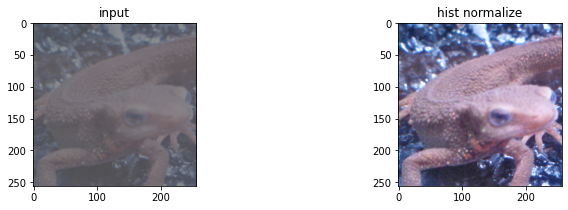

In [69]:
def hist_normalize(img, a, b):
    min,max = img.min(), img.max()
    out = (img-min) / (max-min) * (b-a) + a
    out = np.clip(out, a,b).astype(np.uint8)
    return out

img_dark_hist_norm = hist_normalize(img_dark, a=0, b=255) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist normalize'); plt.imshow(img_dark_hist_norm)
plt.show()

106.82347615559895 14.010876302431814


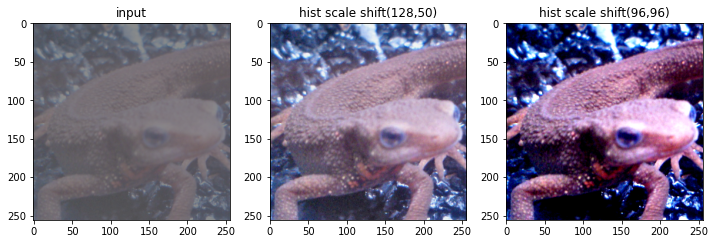

In [74]:
def hist_scaleshift(img, m, s):
    m0, s0 = img.mean(), img.std()
    out = img.astype(np.float32)
    out = (img - m0) / s0 * s + m
    return np.clip(out, 0,255).astype(np.uint8)

img_dark_hist_scaleshift = hist_scaleshift(img_dark, m=128, s=50)
img_dark_hist_scaleshift2 = hist_scaleshift(img_dark, m=96, s=96)

print(img_dark.mean(), img_dark.std())
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 3, 2); plt.title('hist scale shift(128,50)'); plt.imshow(img_dark_hist_scaleshift)
plt.subplot(1, 3, 3); plt.title('hist scale shift(96,96)'); plt.imshow(img_dark_hist_scaleshift2)
plt.show()

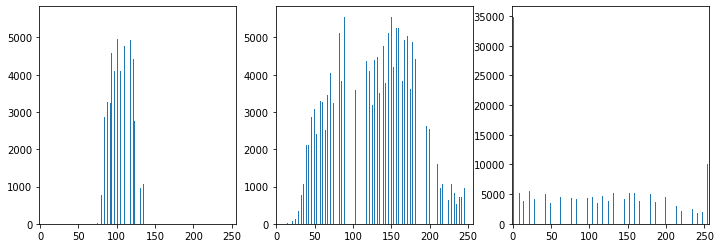

In [78]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([-1, 256])
plt.subplot(1, 3, 2); plt.hist(img_dark_hist_scaleshift.ravel(), bins=255); plt.xlim([-1, 256])
plt.subplot(1, 3, 3); plt.hist(img_dark_hist_scaleshift2.ravel(), bins=255); plt.xlim([-1, 256])
plt.show()